In [1]:
import DQRL
from tqdm import tqdm
import gymnasium as gym

In [2]:
trainCP = gym.make('CartPole-v1')
numInputs = trainCP.observation_space.shape[0]
numActions = trainCP.action_space.n

In [3]:
scores = []
episode = 0
EPISODES = 25000
agent = DQRL.DuelingDoubleDQN(learningRate=0.005, discountRate=0.99,
                              epsMax = 1.00, epsMin = 0.05, epsDec = EPISODES*6//7,
                              numInputs = numInputs, numActions = numActions, nodes = (512, 512), sync = 5*trainCP.spec.max_episode_steps,
                              capacity = 8*trainCP.spec.max_episode_steps, batchSize = 32)

In [4]:
for episode in tqdm(range(EPISODES), desc=f"ep: {episode}", leave=True, ncols=100):
    score = 0
    done = False
    state, info = trainCP.reset(seed = 42)

    while not done:
        action = agent.selectEpsilonGreedyAction(state=state)
        new_state, reward, terminated, truncated, info = trainCP.step(action=action)
        agent.step(state=state, action=action, reward=reward, state_=new_state, terminated=terminated)
        done = terminated or truncated
        score += reward
        state = new_state
    agent.update()
    scores.append(score)

ep: 0:   0%|                                                              | 0/20000 [00:00<?, ?it/s]/home/pranav/Workspace/RL/src/Q-Learning/DeepQ/DQRL.py:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batchS  = torch.FloatTensor([self.bufferS[idx]  for idx in indices]).to(DEVICE)
/home/pranav/Workspace/RL/src/Q-Learning/DeepQ/DQRL.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, device=DEVICE, dtype=torch.float32)
ep: 0: 100%|██████████████████████████████████████████████████| 20000/20000 [07:59<00:00, 41.71it/s]


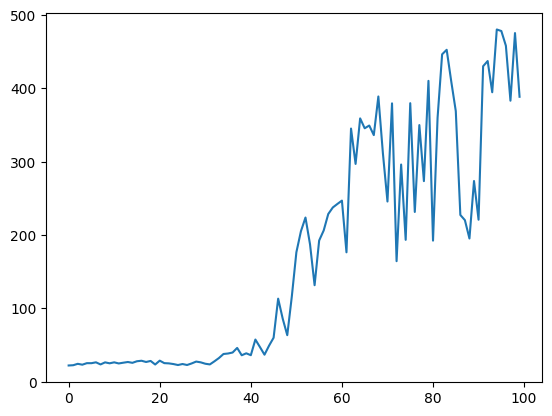

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 250
avgNscores = [np.mean(scores[k*N:(k+1)*N]) for k in range(0, EPISODES//N)]
plt.plot(np.arange(EPISODES//N), avgNscores)
plt.show()

In [10]:
testCP = gym.make('CartPole-v1', render_mode = 'human')

for episode in range(5):
    done = False
    state, info = testCP.reset(seed = 42)

    while not done:
        action = agent.selectGreedyAction(state=state)
        new_state, reward, terminated, truncated, info = testCP.step(action=action)
        done = terminated or truncated
        state = new_state

testCP.close()